In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

### sample input

2013-01-01
2013-01-01
24
34
34
34
35
35
35
35
36
36
36
37
36
36
35
34
33
32
31
30
29
26
25
23
22
1

In [4]:
sample='2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'
sample

'2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'

In [5]:
sample=sample.split()
sample

['2013-01-01',
 '2013-01-01',
 '24',
 '34',
 '34',
 '34',
 '35',
 '35',
 '35',
 '35',
 '36',
 '36',
 '36',
 '37',
 '36',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '29',
 '26',
 '25',
 '23',
 '22',
 '1']

In [6]:
startdate=sample[0]
enddate=sample[1]
count=sample[2]
temperature=sample[3:-1]
predict_days=sample[-1]

In [7]:
from datetime import datetime,timedelta
startdatetime=datetime.strptime(startdate,'%Y-%m-%d')
tmp=[]
for i in range(int(count)):
    row=(startdatetime,temperature[i])
    tmp.append(row)
    startdatetime+=timedelta(hours=1)
labels=['datetime','temp']
result=pd.DataFrame.from_records(tmp,columns=labels)
result

,datetime,temp
0,2013-01-01 00:00:00,34
1,2013-01-01 01:00:00,34
2,2013-01-01 02:00:00,34
3,2013-01-01 03:00:00,35
4,2013-01-01 04:00:00,35
5,2013-01-01 05:00:00,35
6,2013-01-01 06:00:00,35
7,2013-01-01 07:00:00,36
8,2013-01-01 08:00:00,36
9,2013-01-01 09:00:00,36


In [8]:
temp=pd.read_csv('../input/historical-hourly-weather-data/temperature.csv')
temp.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.83000,287.170000,307.59,305.47,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.83465,287.186092,307.59,304.31,310.495769,304.4,304.4,303.5


In [9]:
boston=temp.loc[:,['datetime','Boston']]
boston.head(3)

,datetime,Boston
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092


In [10]:
# clean the data

print(boston.isnull().sum())
boston.fillna(method='bfill',inplace=True)
boston.isnull().sum()

datetime    0
Boston      3
dtype: int64


datetime    0
Boston      0
dtype: int64

In [11]:
#change temperature into C

boston.iloc[:,1]=boston.iloc[:,1].apply(round)-273.15

#select part of data into train test split
bostonsample=boston[boston['datetime']>='2013-01-01 00:00:00']
bostonsample=bostonsample.iloc[0:12*(154+48)]

bostonsample['datetime']=pd.to_datetime(bostonsample['datetime'])
bostonsample.columns=['time','temp']
bostonsample

,time,temp
2196,2013-01-01 00:00:00,-4.15
2197,2013-01-01 01:00:00,-4.15
2198,2013-01-01 02:00:00,-5.15
2199,2013-01-01 03:00:00,-6.15
2200,2013-01-01 04:00:00,-6.15
...,...,...
4615,2013-04-11 19:00:00,16.85
4616,2013-04-11 20:00:00,15.85
4617,2013-04-11 21:00:00,14.85
4618,2013-04-11 22:00:00,12.85


In [12]:
train=bostonsample[0:77*24]
test=bostonsample[77*24:]

In [13]:
!pip install chart_studio

^C


In [14]:
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'chart_studio'

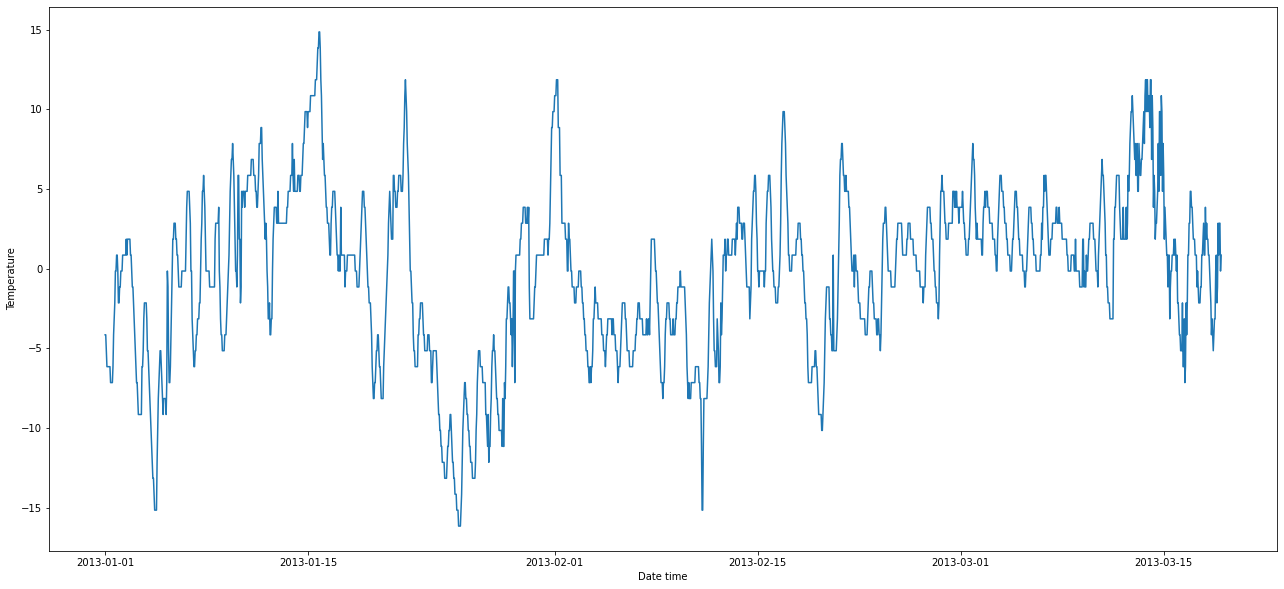

In [15]:
plt.figure(figsize=(22,10))
plt.plot(train.time,train.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

In [16]:
import warnings   
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

In [17]:
ts=train
ts.index=ts.time
ts.drop('time',inplace=True,axis=1)

In [18]:
ts.head()

,temp
time,
2013-01-01 00:00:00,-4.15
2013-01-01 01:00:00,-4.15
2013-01-01 02:00:00,-5.15
2013-01-01 03:00:00,-6.15
2013-01-01 04:00:00,-6.15


In [19]:
ts.rolling(window=6).mean().head(10)

,temp
time,
2013-01-01 00:00:00,NaN
2013-01-01 01:00:00,NaN
2013-01-01 02:00:00,NaN
2013-01-01 03:00:00,NaN
2013-01-01 04:00:00,NaN
2013-01-01 05:00:00,-5.316667
2013-01-01 06:00:00,-5.650000
2013-01-01 07:00:00,-5.983333
2013-01-01 08:00:00,-6.150000


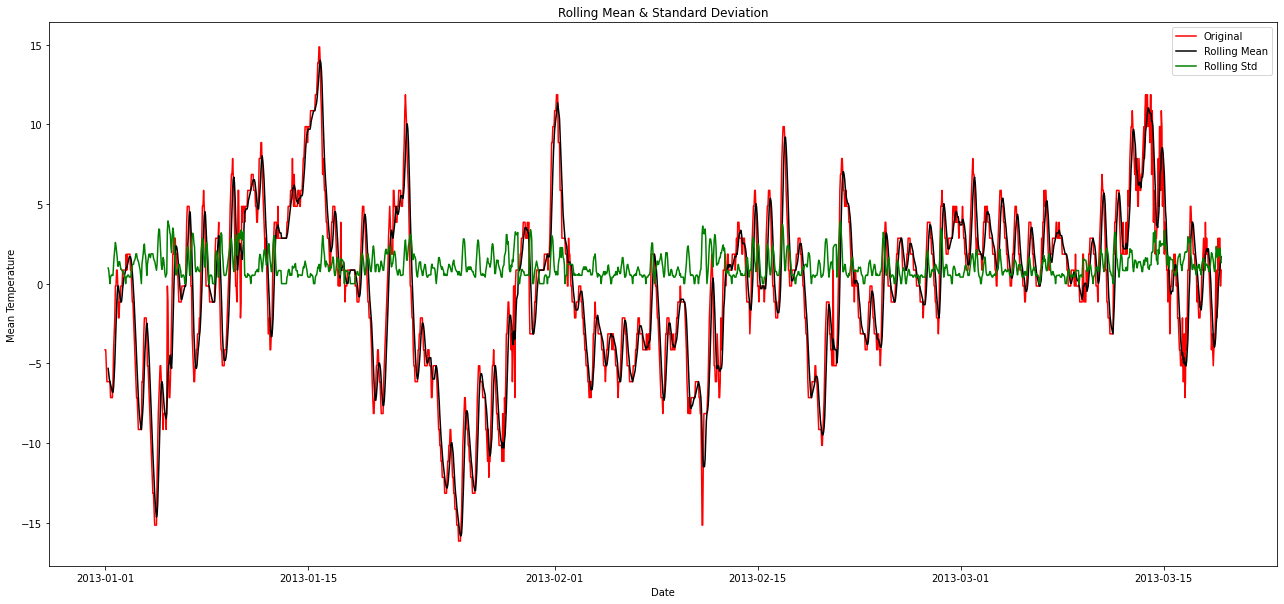

Test statistic:  -4.805757678440782
p-value:  5.3023299012569774e-05
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [20]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts.temp)
check_adfuller(ts.temp)

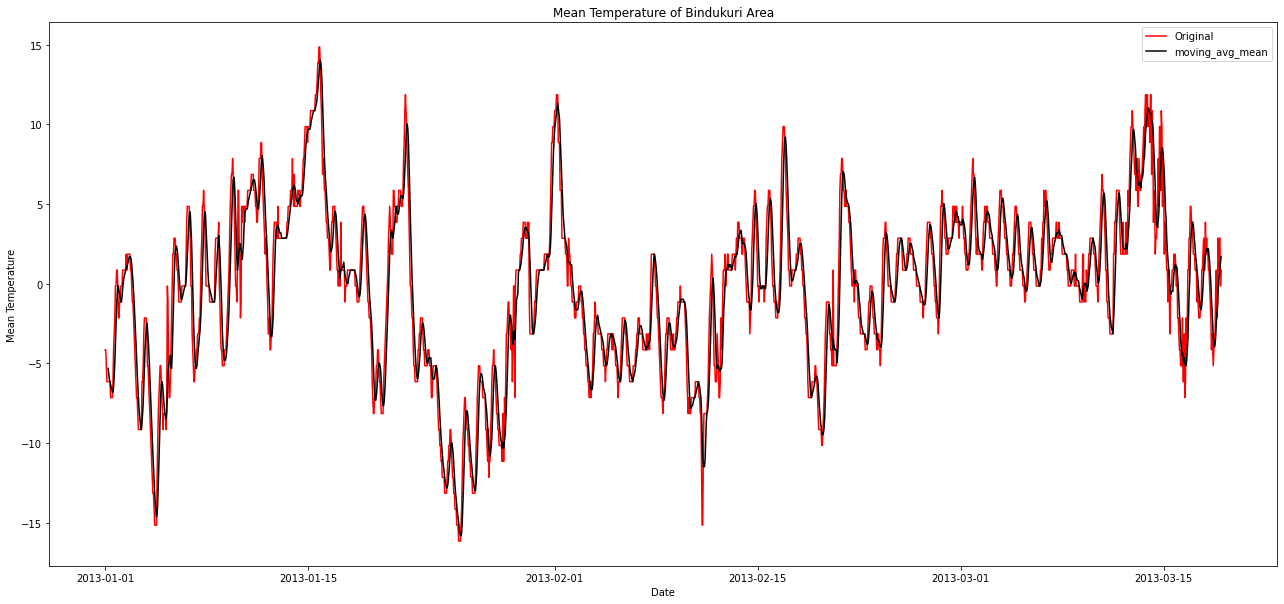

In [21]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

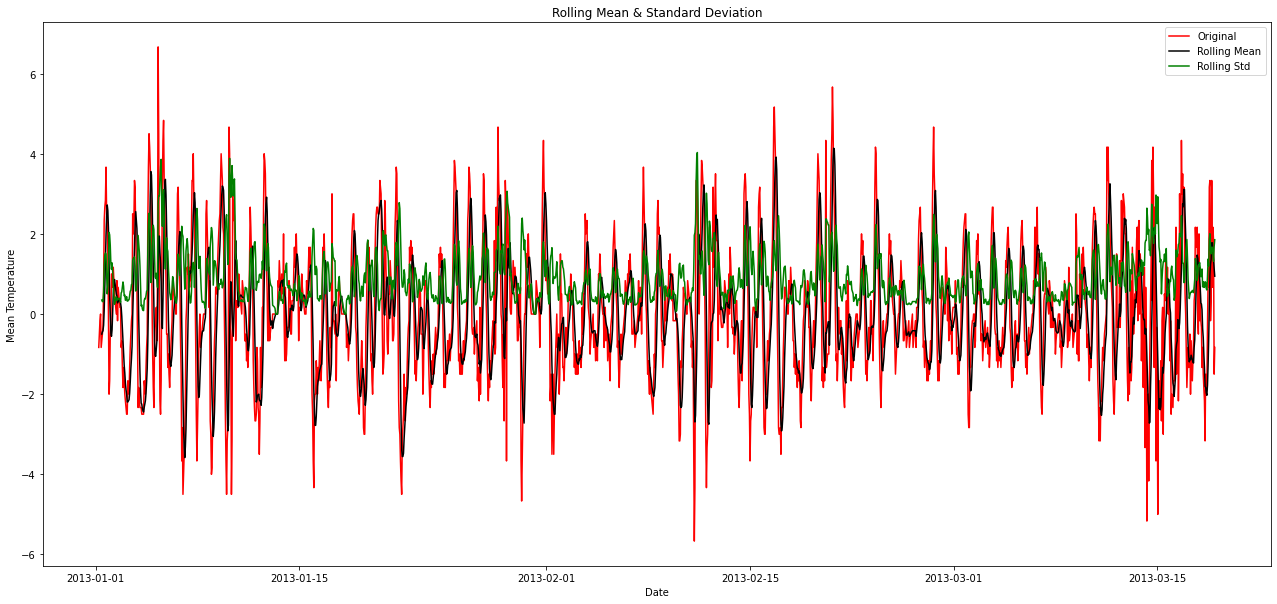

Test statistic:  -7.7173165208729015
p-value:  1.21849419533819e-11
Critical Values: {'1%': -3.4339481027788024, '5%': -2.8631293617920544, '10%': -2.5676161227508754}


In [22]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.temp)

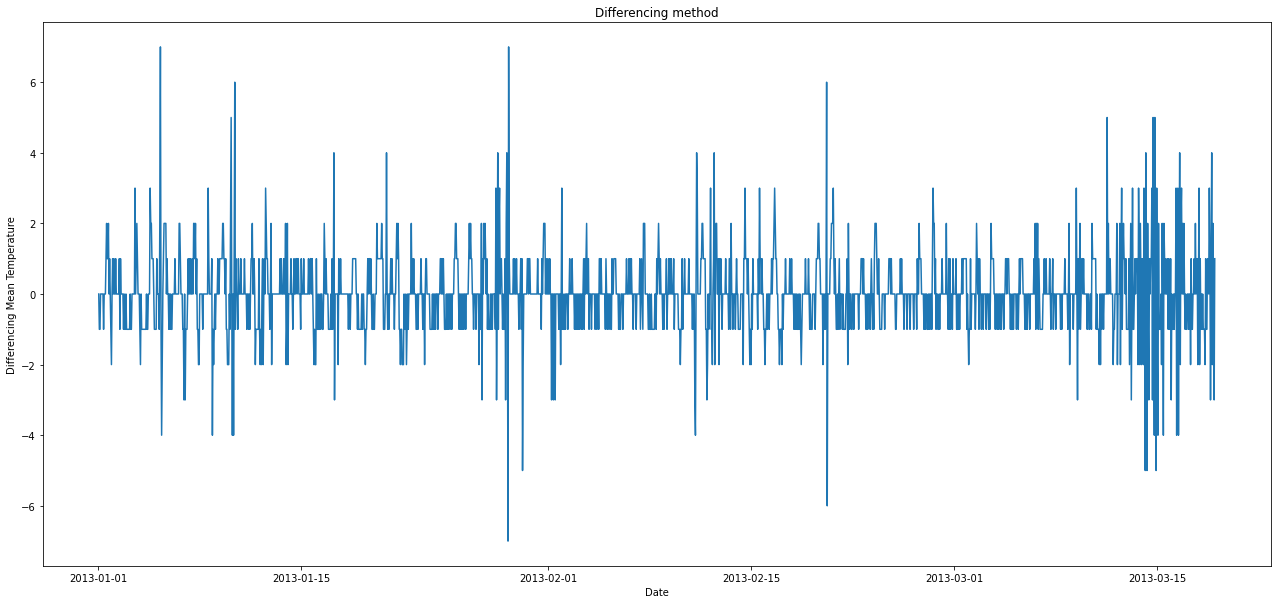

In [23]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

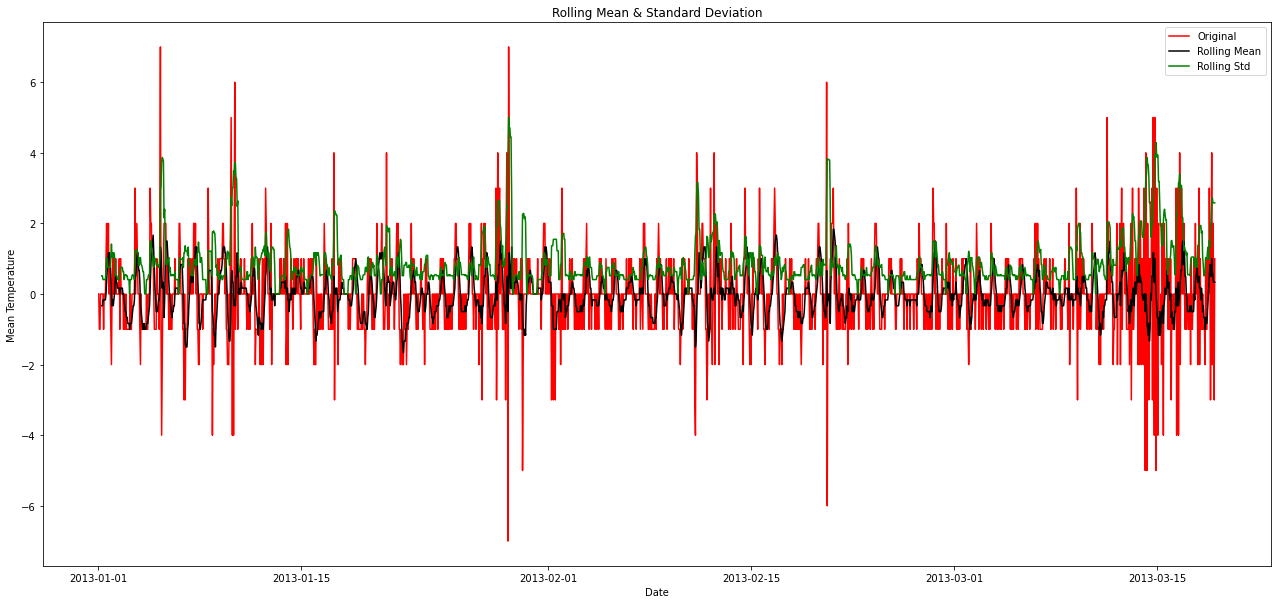

Test statistic:  -8.002673209324762
p-value:  2.3114355645028688e-12
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [24]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.temp)

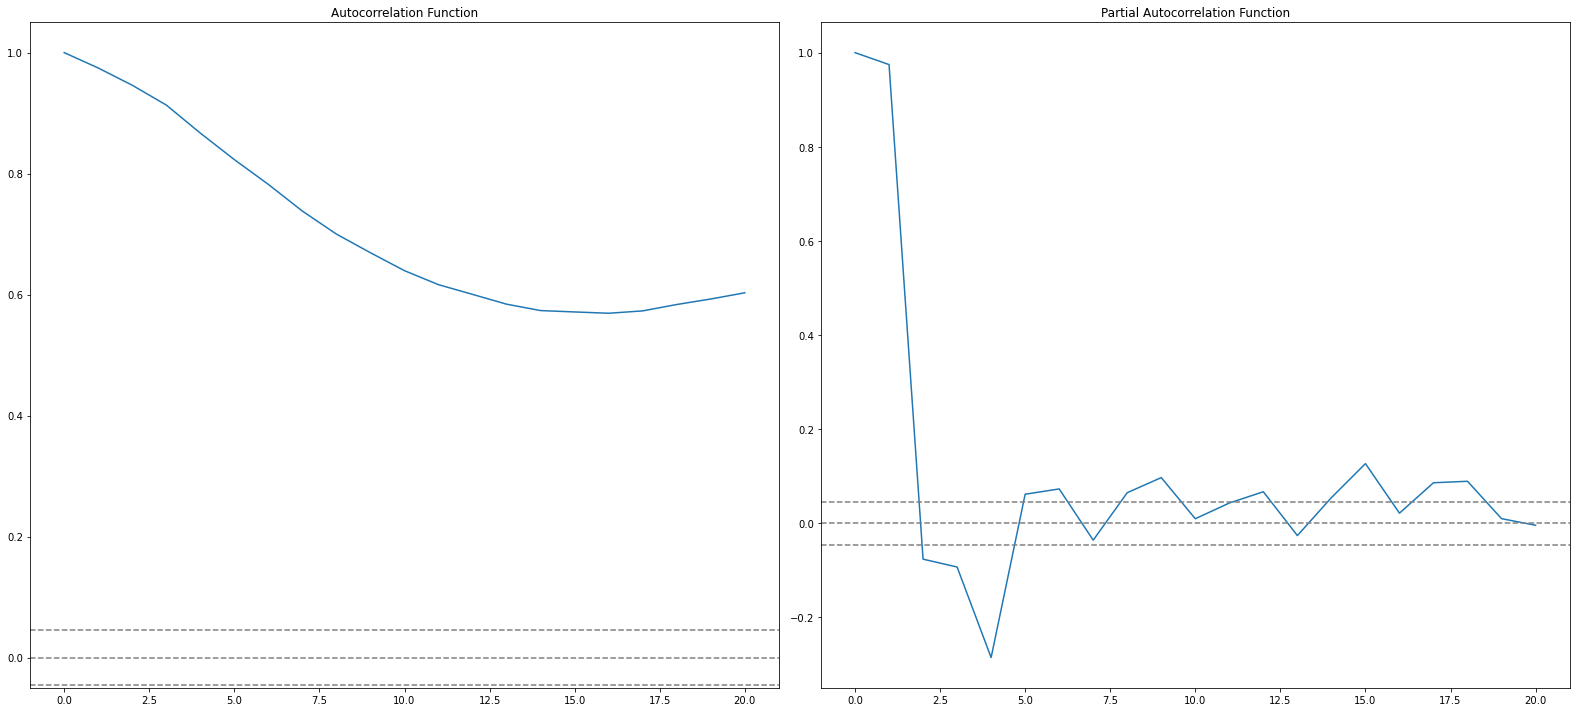

In [25]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [40]:
lag_acf

array([ 1.        ,  0.06287385,  0.08060436,  0.26923791, -0.05039083,
       -0.05684207,  0.06408194, -0.12092403, -0.14349897, -0.02499772,
       -0.12777615])

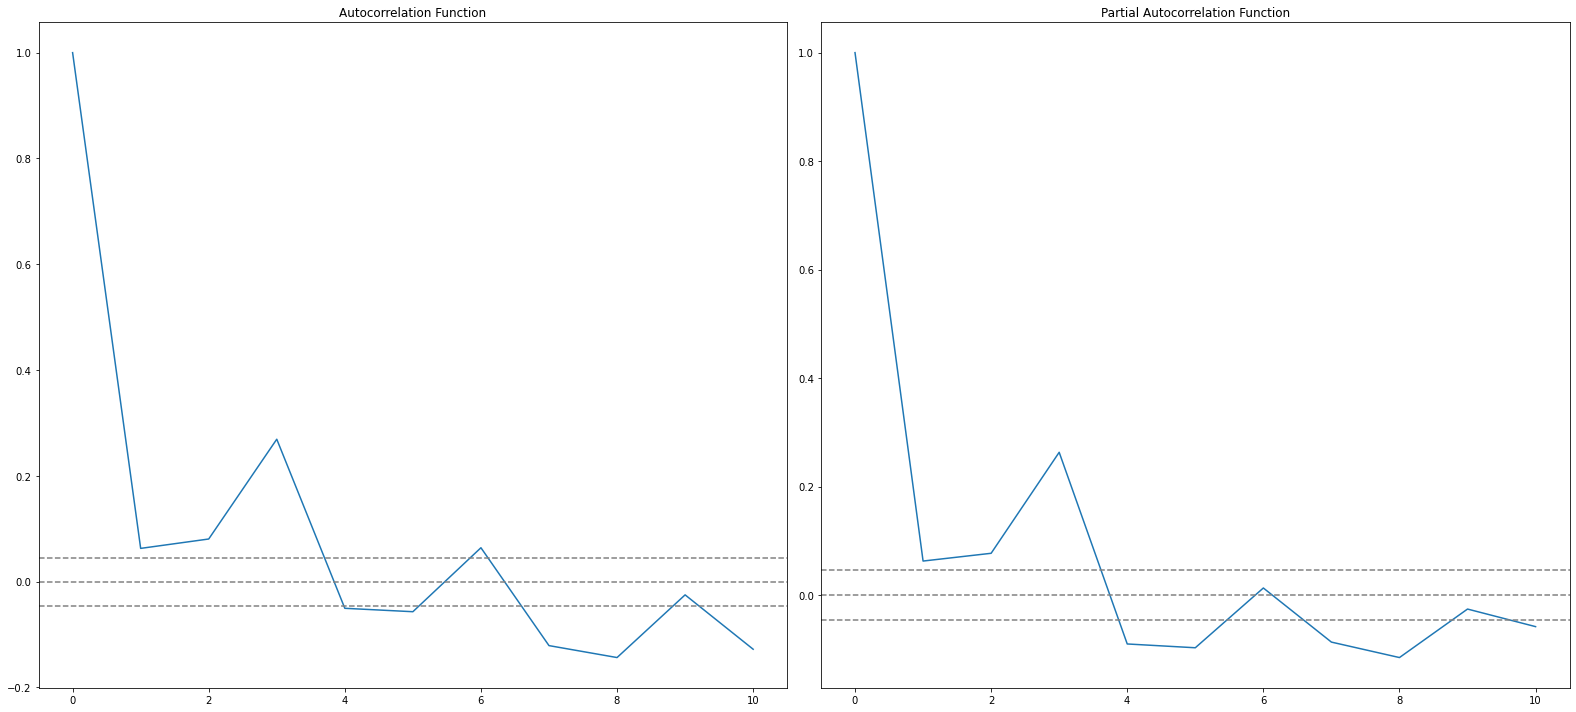

In [26]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

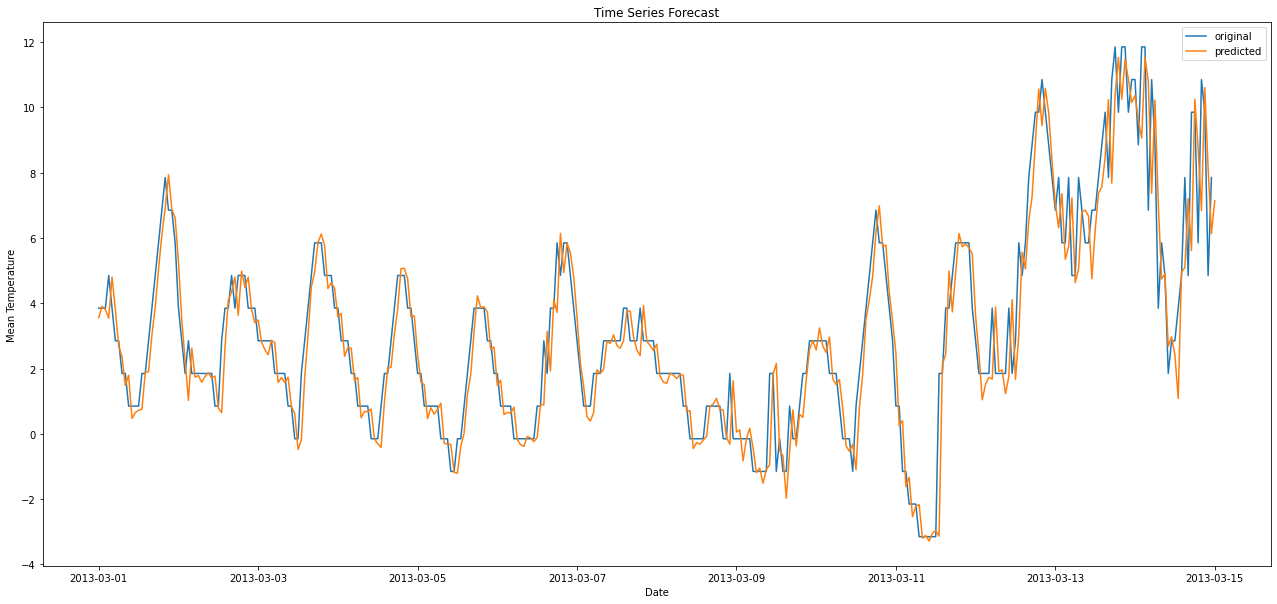

In [48]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(4,0,4)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2013, 3, 1, 0, 0, 0)
end_index = datetime(2013, 3, 15, 0, 0, 0)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(bostonsample.time[59*24:73*24],bostonsample.temp[59*24:73*24],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [ ]:
train

In [ ]:
bostonsample[154*24:]

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(bostonsample.time,bostonsample.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()